## IDENTIFYING DEFECTS DURING SEMICONDUCTOR MANUFACTURING USING MACHINE LEARNING.
 
Data from a semi-conductor manufacturing process.

#### Data Set Characteristics: Multivariate
#### Number of Instances: 1567
#### Area: Computer
#### Attribute Characteristics: Real
#### Number of Attributes: 10
#### Associated Tasks: Classification, Causal-Discovery
#### Missing Values? Yes
| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Room_temp           	| Room Temperature                                 	|
| Current_leakage    	| Taken as a Amp or mA.                            	|
| Voltage_leakage     	| Taken as a volt or mV.                        	|
| cmos_design        	| measuerment of dimension                      	|
| Cut_off_freq         	| The final limit taken                         	|
| Silica_effect     	| Taken during wafer manufacturing              	|
| Avoid_dust_particle  	| denisty of air and dust                         	|
| Avoid_uv_light    	| the amount of darkness and light              	|
| Wafer_process        	| overall design                                	|


In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('data1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 1567 non-null   object 
 1   Room_Temp            1561 non-null   float64
 2   silica_effect        1560 non-null   float64
 3   cmoa_design          1553 non-null   float64
 4   current_leakage      1553 non-null   float64
 5   Voltage_leakage      1553 non-null   float64
 6   Cut_off_freq         1553 non-null   float64
 7   avoid_dust_partical  1553 non-null   float64
 8   avoid_uv_light       1558 non-null   float64
 9   wafer_process        1565 non-null   float64
 10  Pass/Fail            1567 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 134.8+ KB


In [4]:
data.dtypes

Time                    object
Room_Temp              float64
silica_effect          float64
cmoa_design            float64
current_leakage        float64
Voltage_leakage        float64
Cut_off_freq           float64
avoid_dust_partical    float64
avoid_uv_light         float64
wafer_process          float64
Pass/Fail                int64
dtype: object

In [5]:
# presence of missing data
# ways to handle missing data
# 1 if the data is huge we can remove 
# 2 if the data is numeric  using central tendecny 
# mean median r mode
data = data.fillna(data.mean())

In [6]:
data.count()

Time                   1567
Room_Temp              1567
silica_effect          1567
cmoa_design            1567
current_leakage        1567
Voltage_leakage        1567
Cut_off_freq           1567
avoid_dust_partical    1567
avoid_uv_light         1567
wafer_process          1567
Pass/Fail              1567
dtype: int64

In [7]:
data = data.drop(['Time'], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Room_Temp            1567 non-null   float64
 1   silica_effect        1567 non-null   float64
 2   cmoa_design          1567 non-null   float64
 3   current_leakage      1567 non-null   float64
 4   Voltage_leakage      1567 non-null   float64
 5   Cut_off_freq         1567 non-null   float64
 6   avoid_dust_partical  1567 non-null   float64
 7   avoid_uv_light       1567 non-null   float64
 8   wafer_process        1567 non-null   float64
 9   Pass/Fail            1567 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 122.5 KB


In [9]:
data.dtypes

Room_Temp              float64
silica_effect          float64
cmoa_design            float64
current_leakage        float64
Voltage_leakage        float64
Cut_off_freq           float64
avoid_dust_partical    float64
avoid_uv_light         float64
wafer_process          float64
Pass/Fail                int64
dtype: object

In [10]:
data

,Room_Temp,silica_effect,cmoa_design,current_leakage,Voltage_leakage,Cut_off_freq,avoid_dust_partical,avoid_uv_light,wafer_process,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-1
...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-1


In [11]:
data.describe()

,Room_Temp,silica_effect,cmoa_design,current_leakage,Voltage_leakage,Cut_off_freq,avoid_dust_partical,avoid_uv_light,wafer_process,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,1.000000


In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
data.head()

,Room_Temp,silica_effect,cmoa_design,current_leakage,Voltage_leakage,Cut_off_freq,avoid_dust_partical,avoid_uv_light,wafer_process,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-1


In [14]:
data["Pass/Fail"].describe()

count    1567.000000
mean       -0.867262
std         0.498010
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max         1.000000
Name: Pass/Fail, dtype: float64

In [15]:
data["Pass/Fail"].unique()

array([-1,  1], dtype=int64)

In [16]:
print(data.corr()["Pass/Fail"].abs().sort_values(ascending=False))

Pass/Fail              1.000000
wafer_process          0.028016
Room_Temp              0.025141
current_leakage        0.024623
avoid_dust_partical    0.016239
Voltage_leakage        0.013756
avoid_uv_light         0.012991
silica_effect          0.002603
cmoa_design            0.000957
Cut_off_freq                NaN
Name: Pass/Fail, dtype: float64


In [17]:
data 

,Room_Temp,silica_effect,cmoa_design,current_leakage,Voltage_leakage,Cut_off_freq,avoid_dust_partical,avoid_uv_light,wafer_process,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-1
...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-1


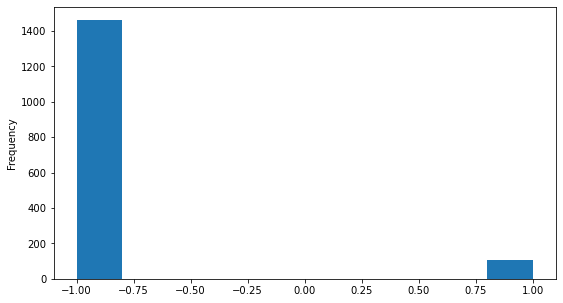

In [18]:
plt.figure(figsize = (9, 5)) 
data['Pass/Fail'].plot(kind ="hist")

# THE DATA SET IS NOW READY..


# WE CAN BEGIN WITH OUR TRAINING MODELS





## In this model, we took took 4 algorithms and varied their various parameters and compared the final models. 
##  dataset  is spit into 67% training data and 33% testing data.

In [19]:
from sklearn.model_selection import train_test_split

predictors = data.drop("Pass/Fail",axis=1)
target = data["Pass/Fail"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [20]:
X_train

,Room_Temp,silica_effect,cmoa_design,current_leakage,Voltage_leakage,Cut_off_freq,avoid_dust_partical,avoid_uv_light,wafer_process
1476,3000.24,2477.37,2207.1000,1298.4309,1.0251,100.0,96.9478,0.1203,1.4642
218,3038.21,2521.84,2273.7556,1549.8407,1.4105,100.0,105.0467,0.1171,1.3666
1137,2895.09,2552.96,2260.7333,1969.7867,1.2109,100.0,91.3367,0.1207,1.4135
1533,3011.32,2417.43,2184.9889,1124.2096,2.1987,100.0,114.5856,0.1265,1.3834
1092,3186.16,2316.01,2169.9444,1095.3519,1.3425,100.0,104.0144,0.1208,1.4757
...,...,...,...,...,...,...,...,...,...
763,3032.26,2455.05,2145.4555,1017.0577,1.4534,100.0,103.7878,0.1229,1.3602
835,3003.72,2537.66,2210.7778,2008.9216,1.1351,100.0,91.1078,0.1240,1.3940
1216,3031.85,2439.42,2172.8111,969.3436,1.2736,100.0,102.7367,0.1243,1.4711
559,3072.99,2471.62,2126.6555,1015.0770,1.4381,100.0,102.4733,0.1255,1.5006


In [21]:
Y_train

1476   -1
218     1
1137   -1
1533   -1
1092   -1
       ..
763    -1
835    -1
1216   -1
559    -1
684    -1
Name: Pass/Fail, Length: 1253, dtype: int64

##  Next step is on understanding the data.
###  We use Correalation Matrix here understand the degree of association between the features.

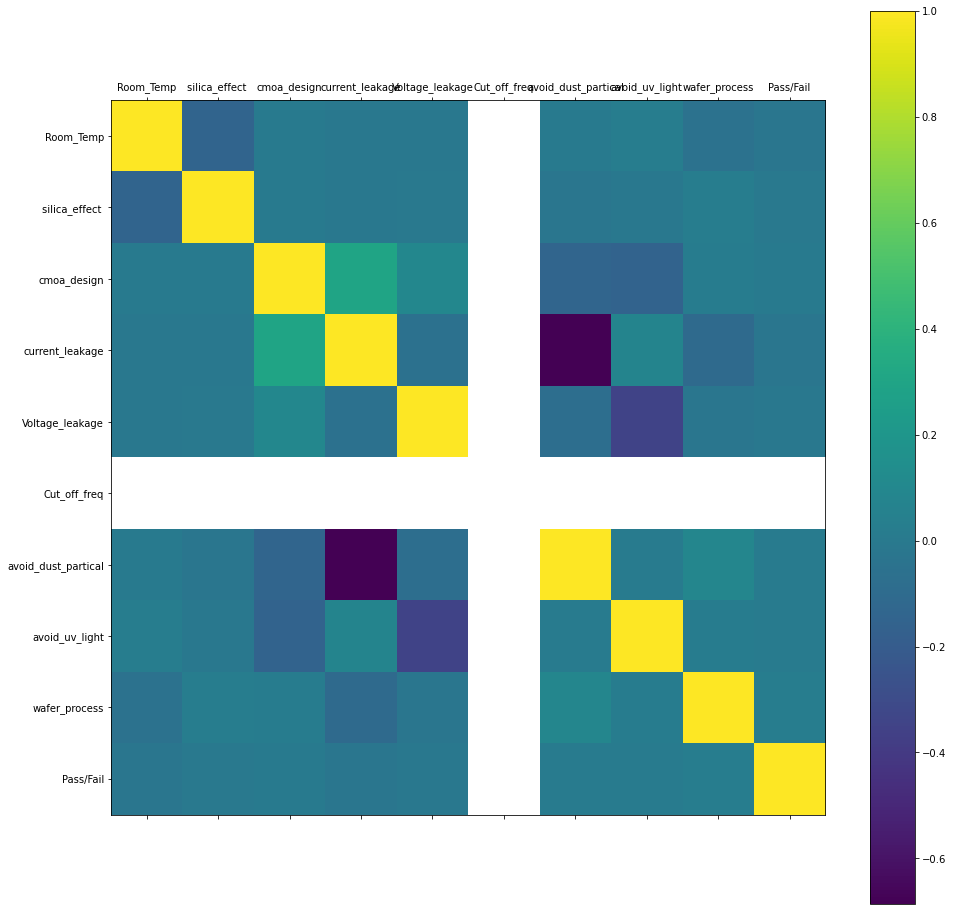

In [22]:
rcParams['figure.figsize'] = 20, 20
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

## We find no feature that has a significant correalation with the target value
###  Some features even have negative correlation with the target value, but few features have lower positive correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284FFEECFD0>,
      dtype=object)

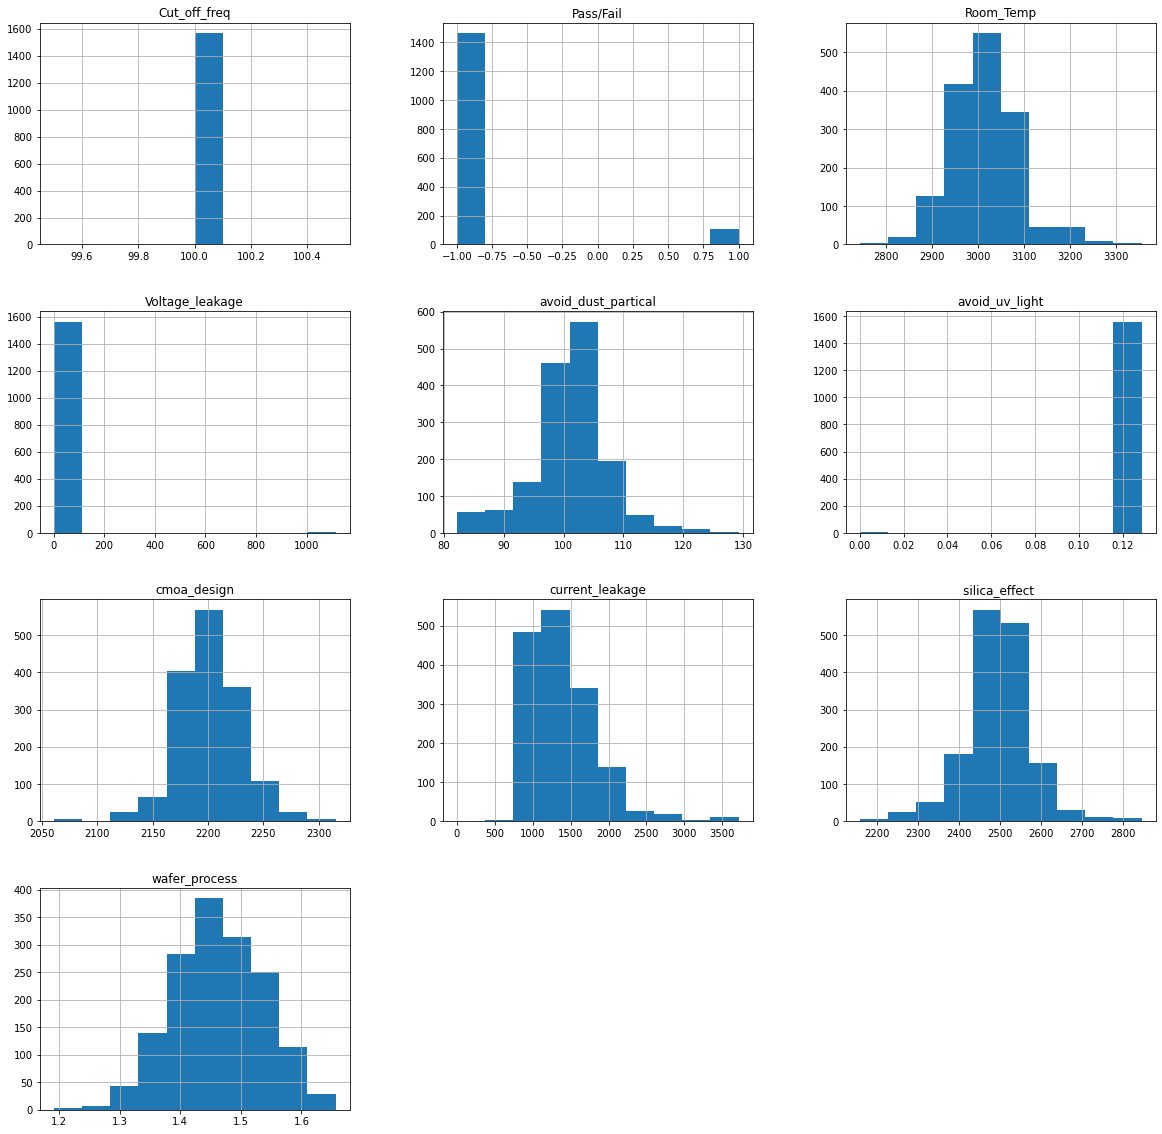

In [23]:
data.hist()

In [24]:
data.describe()

,Room_Temp,silica_effect,cmoa_design,current_leakage,Voltage_leakage,Cut_off_freq,avoid_dust_partical,avoid_uv_light,wafer_process,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,1.000000


## Algorithm 1: K Neighbours Classifier
This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point. However, the number of neighbors can be varied.Neighbours can be varied them from 1 to 20 neighbors and calculated the test score in each case.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_scores.append(knn_classifier.score(X_test, Y_test))
knn_scores

[0.8980891719745223,
 0.9554140127388535,
 0.9490445859872612,
 0.9554140127388535,
 0.9554140127388535,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497,
 0.9585987261146497]

### Training and Testing phase Completed.
### Next Plotting


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

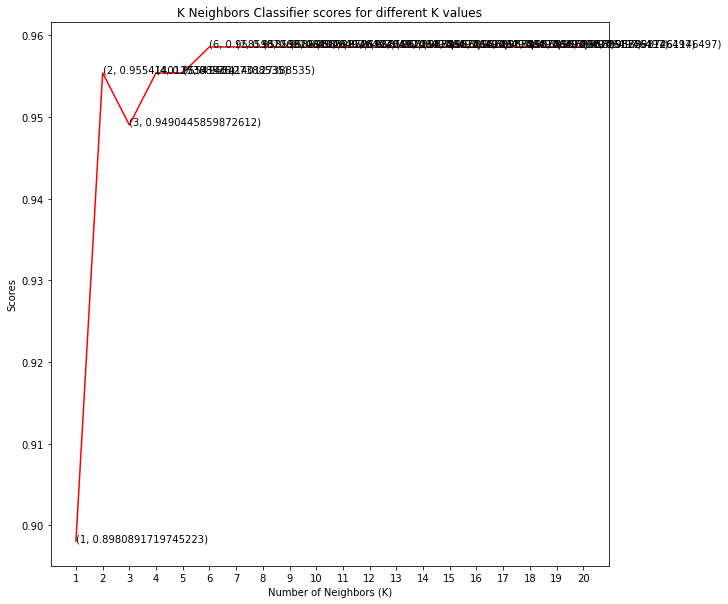

In [26]:
rcParams['figure.figsize'] = 10,10
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

# Navie Bayes

In [27]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [28]:
BernNB = BernoulliNB(binarize=.1)
BernNB.fit(X_train,Y_train)
print(BernNB)
y_expect = Y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred)*100)
score_nb = accuracy_score(y_expect,y_pred)*100

BernoulliNB(binarize=0.1)
95.85987261146497


In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[301   0]
 [ 13   0]]


# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [31]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=5,min_samples_leaf=3)

clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [32]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en
print(accuracy_score(y_expect,y_pred)*100)
score_dt = accuracy_score(Y_test,y_pred_en)*100

95.85987261146497


In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred_en))

[[299   2]
 [ 13   0]]


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [35]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.54 %


In [36]:
scores = [score_nb,score_dt,score_rf]
algorithms = ["naive_bayes","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using naive_bayes is: 95.85987261146497 %
The accuracy score achieved using Decision Tree is: 95.22292993630573 %
The accuracy score achieved using Random Forest is: 95.54 %


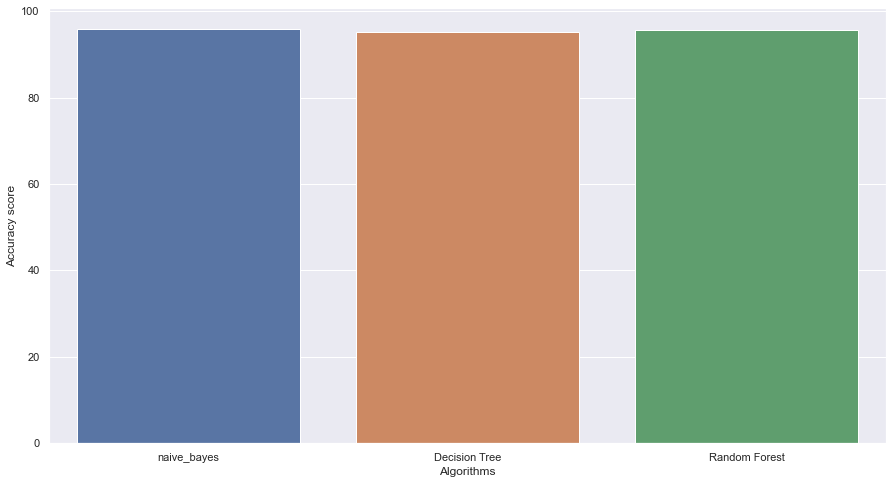

In [37]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

In [ ]:
from tkinter import *
from tkinter import ttk

root = Tk()
root.title('Industrial Monitoring')
root.geometry('1200x850')
#root.config(font=("Courier 35 italic bold "),background="#DDE794")
root.configure(background="tan1")

var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="tan1")
var.set('Industrial Monitoring')
label.grid(row=0,columnspan=6)



label_1 = ttk.Label(root, text ='Room_Temp',font=("Helvetica", 16),background="tan1")
label_1.grid(row=11,column=0)
    
Entry_1= Entry(root)
Entry_1.grid(row=11,column=1)


label_2 = ttk.Label(root, text ='silica_effect',font=("Helvetica", 16),background="tan1")
label_2.grid(row=12,column=0)
    
Entry_2 = Entry(root)
Entry_2.grid(row=12,column=1)
    
    
label_3 = ttk.Label(root, text ='cmoa_design',font=("Helvetica", 16),background="tan1")
label_3.grid(row=13,column=0)
    
Entry_3 = Entry(root)
Entry_3.grid(row=13,column=1)

label_4 = ttk.Label(root, text ='current_leakage',font=("Helvetica", 16),background="tan1")
label_4.grid(row=14,column=0)
    
Entry_4= Entry(root)
Entry_4.grid(row=14,column=1)

label_5 = ttk.Label(root, text ='Voltage_leakage',font=("Helvetica", 16),background="tan1")
label_5.grid(row=15,column=0)
    
Entry_5 = Entry(root)
Entry_5.grid(row=15,column=1)
    
    
label_6 = ttk.Label(root, text ='Cut_off_freq',font=("Helvetica", 16),background="tan1")
label_6.grid(row=16,column=0)
    
Entry_6 = Entry(root)
Entry_6.grid(row=16,column=1)

label_7 = ttk.Label(root, text ='avoid_dust_partical',font=("Helvetica", 16),background="tan1")
label_7.grid(row=17,column=0)
    
Entry_7= Entry(root)
Entry_7.grid(row=17,column=1)

label_8 = ttk.Label(root, text ='avoid_uv_light',font=("Helvetica", 16),background="tan1")
label_8.grid(row=18,column=0)

Entry_8 = Entry(root)
Entry_8.grid(row=18,column=1)
    
    
label_9 = ttk.Label(root, text ='wafer_process',font=("Helvetica", 16),background="tan1")
label_9.grid(row=19,column=0)
    
Entry_9 = Entry(root)
Entry_9.grid(row=19,column=1)


def predict():
    predictors = data.iloc[:,:9]
    target = data["Pass/Fail"]
    X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
    BernNB = BernoulliNB(binarize=.1)
    BernNB.fit(X_train,Y_train)
    print(BernNB)
    y_expect = Y_test
    y_pred = BernNB.predict(X_test)
    print(accuracy_score(y_expect,y_pred)*100)
    score_nb = accuracy_score(y_expect,y_pred)*100
    
    Room_Temp = Entry_1.get()
    silica_effect = Entry_2.get()
    cmoa_design = Entry_3.get()
    current_leakage = Entry_4.get()
    Voltage_leakage = Entry_5.get()
    Cut_off_freq = Entry_6.get()
    avoid_dust_partical = Entry_7.get()
    avoid_uv_light = Entry_8.get()
    wafer_process = Entry_9.get() 
    out = BernNB.predict([[float(Room_Temp),
       float(silica_effect),
       float(cmoa_design),
       float(current_leakage),
       float(Voltage_leakage),
       float(Cut_off_freq),
       float(avoid_dust_partical),
       float(avoid_uv_light),
       float(wafer_process)]])
    if out == -1:
        print("PASS")
        print("Yes,you may Proceed!")
        output.delete(0,END)
        output.insert(0,'PASS')     
    else:
        print("FAIL")
        print("Sorry there is a glitch somewhere")
        output.delete(0,END)
        output.insert(0,'FAIL')

b1 = Button(root, text = 'Pass/Fail',font=("Helvetica", 16),background="RosyBrown1",command = predict)
b1.grid(row=20,column=0)
    

output = Entry(root)
output.grid(row=20,column=1)
    
root.mainloop()

BernoulliNB(binarize=0.1)
95.85987261146497
PASS
Yes,you may Proceed!
BernoulliNB(binarize=0.1)
95.85987261146497
FAIL
Sorry there is a glitch somewhere
